In [2]:
#Subir archivo
from google.colab import files
files.upload()

Saving Medical_Cost_Dataset.zip to Medical_Cost_Dataset.zip


{'Medical_Cost_Dataset.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00g\x8a;O\xe7d\xc0\x82\xff\xff\xff\xff\xff\xff\xff\xff\r\x00\x14\x00insurance.csv\x01\x00\x10\x00L\xd9\x00\x00\x00\x00\x00\x00\x85?\x00\x00\x00\x00\x00\x00\x85}\xdb\xae-\xbb\x8d\xdd\xbb\x81\xf5\'\x1b\x05\x89\xa2n\x9f\xe3$;\xddF\xda6\xe0\xd3A\x92\xbf\x0f\x07\xa5*Q\xa2\xdc>\x8f\xfb\xd4\xaaY\xba\xf0>8\xf8\xe7\x7f\xfb\xfd\xeb\x8f\xdf\xff\xf7\xd7\x7f\xfb\xeb_~\xfd\xf7\x7f\xff\xcb\x7f\xfc\x8f\x7f\xfc\xfe\xdb\xaf?\xfe\xfa\xf7\xff\xf5\xfb\x1f\xbf\xfe\xf1\xfb\xdf\xfe\xf2\xf7\xbf\xc9?\xff\xf9\x1f\xff\xf6\xfb\x8f\x9f?\xc5\xfe\xeb\x7f\xfe\xfe\xeb\x9f\xff\xe3\xf7/\xaaO\xff\x15~\xfd\xbf\xdf\x7f\xfc\xfa\xe3\xef\xff\xfb?\xff\xfd\xff\xfc\xfe\xe3?\x7f\xc5\xd2\x1a?\x9dX\x9el\xbf\xf4\xb9\x94\x9eZ\x7f\xc5_\x7f\xfb\xfbx\xee\xf7\x9f\xf1\\\xa5\xfc\xe4L\xe9\xe7O\xf4=\xf7+\xed\x0f1s\x7f\xb8\xd0\xcf\x9f\xe4\xff\x8d\xdf\xa4\xa7\x86,\xbf*\xcf\xfd\xed\xef\xff\x98?J\xb1\xcb\x8fr\r%\xca\xa34\x1fmOk\xe7\x93\xa9\x95\xf24\xf9]y.~\x0b\xc9O\xe5\xf1\xe4\xfa\xedTsy

In [3]:
#Descomprimir archivo
!unzip /content/Medical_Cost_Dataset.zip

Archive:  /content/Medical_Cost_Dataset.zip
  inflating: insurance.csv           


In [4]:
#Cargar dataset
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#Informacion de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
'''
FUENTE: https://www.kaggle.com/datasets/mirichoi0218/insurance
VARIABLES:
age: Edad (int64).
sex: Género (object).
bmi: Índice de masa corporal (float64).
children: Número de hijos (int64).
smoker: Fumador o no (object).
region: Región geográfica (object).
charges: Costos médicos (float64).
TAMAÑO:
1338 FILAS × 7 COLUMNAS
'''

In [6]:
#Estadisticas descriptivas de variables numericas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Distribucion de variables categoricas
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
#Revisar la presencia de valores nulos
df.isnull().sum()
#Como no hay valores nulos no hay imputacion que realizar

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
#Identificacion de outliers
import pandas as pd
import numpy as np
#Seleccionar columnas numericas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
#Inicializamos un contador total de outliers
total_outliers = 0
outlier_summary = {}
#Crear un diccionario para almacenar los valores de outliers por columna
outliers_values = {}

for column in numeric_columns:
    #Calcular cuartiles y rango intercuartilico
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    #Definir limites para detectar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Identificar valores fuera de los limites
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    #Actualizar total de outliers
    total_outliers += outliers.shape[0]

    #Guardar detalles en el resumen
    outlier_summary[column] = outliers.shape[0]

    #Guardar los valores de outliers
    outliers_values[column] = outliers[column].values

#Crear un DataFrame resumen de outliers
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outliers'])
outlier_df = outlier_df.sort_values(by='Outliers', ascending=False)

#Mostrar resultados
print("Número total de outliers en el dataset:", total_outliers)
print("\nResumen de outliers por columna:")
print(outlier_df)

#Imprimir los valores que son outliers para cada columna
for column, values in outliers_values.items():
    print(f"\nOutliers en la variable '{column}':")
    print(values)

Número total de outliers en el dataset: 148

Resumen de outliers por columna:
          Outliers
charges        139
bmi              9
age              0
children         0

Outliers en la variable 'age':
[]

Outliers en la variable 'bmi':
[49.06 48.07 47.52 47.41 50.38 47.6  52.58 47.74 53.13]

Outliers en la variable 'children':
[]

Outliers en la variable 'charges':
[39611.7577  36837.467   37701.8768  38711.      35585.576   51194.55914
 39774.2763  48173.361   38709.176   37742.5757  47496.49445 37165.1638
 39836.519   43578.9394  47291.055   47055.5321  39556.4945  40720.55105
 36950.2567  36149.4835  48824.45    43753.33705 37133.8982  34779.615
 38511.6283  35160.13457 47305.305   44260.7499  41097.16175 43921.1837
 36219.40545 46151.1245  42856.838   48549.17835 47896.79135 42112.2356
 38746.3551  42124.5153  34838.873   35491.64    42760.5022  47928.03
 48517.56315 41919.097   36085.219   38126.2465  42303.69215 46889.2612
 46599.1084  39125.33225 37079.372   35147.52848 4888

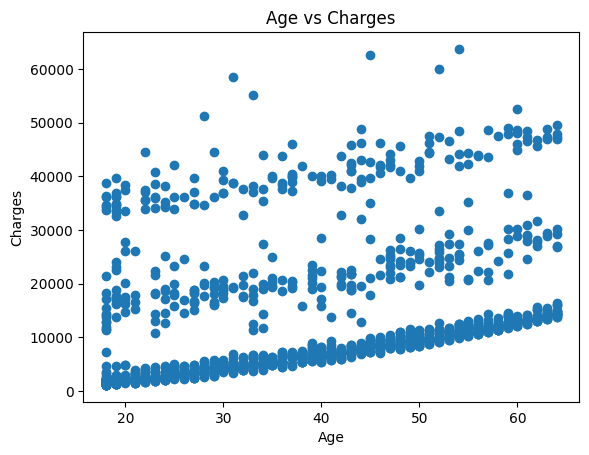

In [11]:
#Grafico de dispersion age vs charges
#Utilizamos este grafico para ver si hay patrones en los datos con respecto
#a charges, ayudando a identificar los outliers y si hay valores realmente inusuales
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


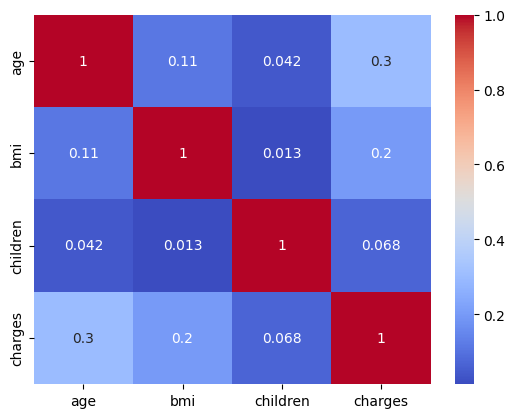

In [16]:
#Al ver el grafico anterior podemos notar valores atipicos en algunas edades, lo cual indica la presencia de probables errores.
#Decidimos reemplazar estos valores calculando con regresion lineal para tener mas precision.
#Para elegir la variable a utilizar en la regresion calcularemos la correlacion.
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)
#Mapa de calor
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
#Con los resultados de la correlacion vemos que la variable con relacion lineal positiva es age.
#Regresion lineal para valores atipicos en charges
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

#Identificar valores atipicos usando los limites del IQR
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Separar las filas con y sin valores atipicos
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
non_outliers = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

#Crear el modelo con los datos sin valores atipicos
X = non_outliers[['age']]
y = non_outliers['charges']

#Escalar los datos para mejorar la precision
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Entrenar el modelo
model = LinearRegression()
model.fit(X_scaled, y)

#Reemplazar los valores atipicos con predicciones del modelo
outliers_scaled = scaler.transform(outliers[['age']])
df.loc[outliers.index, 'charges'] = model.predict(outliers_scaled)


In [21]:
#Para reemplazar los valores del BMI utilizaremos la media por grupo de edad
#Definir el limite para identificar outliers en BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Iterar por cada edad unica en el dataset
for edad in df['age'].unique():
    #Filtrar el dataset por edad
    edad_group = df[df['age'] == edad]

    #Encontrar los outliers en BMI para este grupo de edad
    outliers = (edad_group['bmi'] < lower_bound) | (edad_group['bmi'] > upper_bound)

    #Reemplazar los outliers con la media de BMI de ese grupo de edad
    mean_bmi = edad_group['bmi'].mean()
    df.loc[outliers & (df['age'] == edad), 'bmi'] = mean_bmi

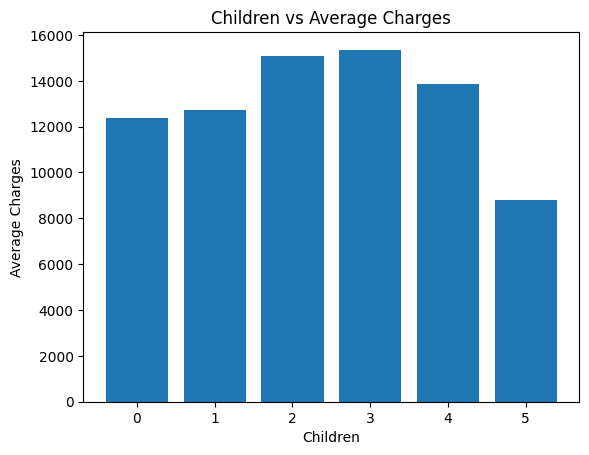

In [14]:
#Grafico de barras de children y charges promedio
average_charges_per_child = df.groupby('children')['charges'].mean()
plt.bar(average_charges_per_child.index, average_charges_per_child.values)
plt.xlabel('Children')
plt.ylabel('Average Charges')
plt.title('Children vs Average Charges')
plt.show()
#Este grafico muestra la relacion que existe entre el costo promedio y la cantidad de hijos

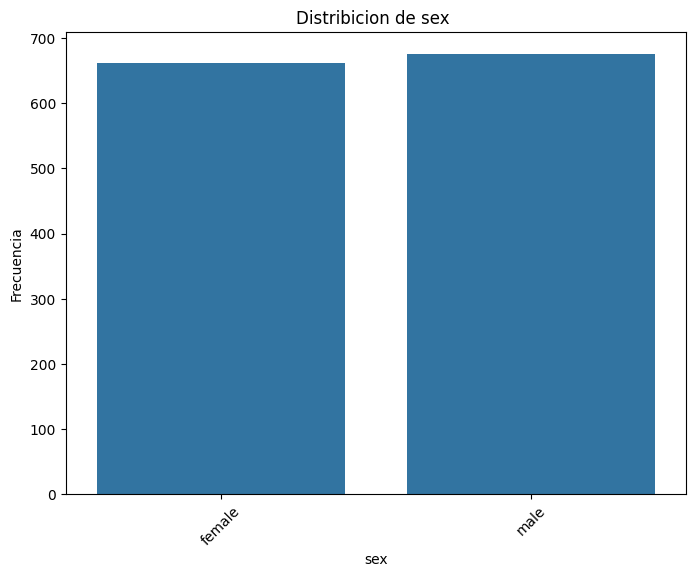

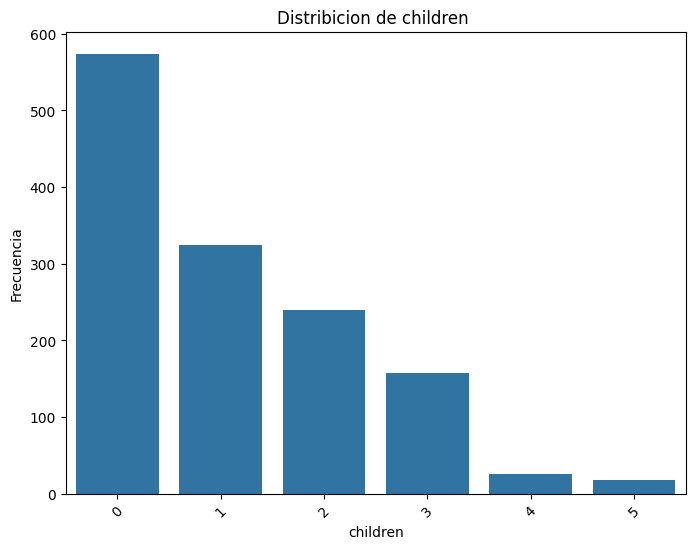

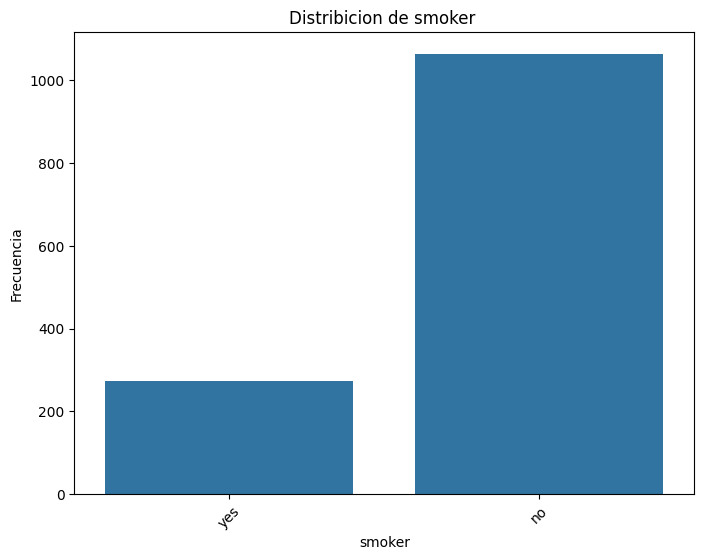

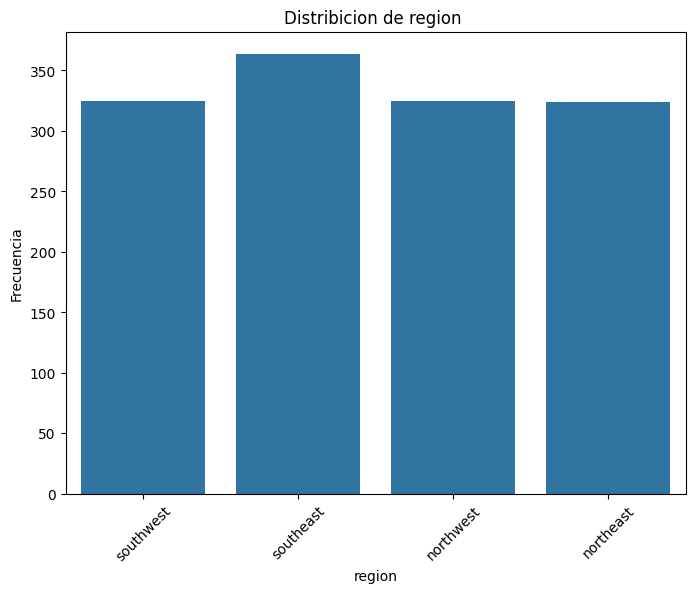

In [27]:
#Grafico de barras de variables categoricas
categorical_columns = df[['sex', 'children', 'smoker', 'region']]
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribicion de {col} ')
    plt.xticks(rotation=45)
    plt.show()
"""
Estos graficos nos permiten ver la distribucion de las variables categoricas
En el grafico de genero podemos ver que tenemos cantidades similares.
Podemos ver que hay mayor cantidad de no fumadores que fumadores.
Las regiones tambien estan balanceadas.
En el grafico de hijos se visualiza una disminucion progresiva de la cantidad de hijos, teniendo
mas cantidad de personas sin hijos.

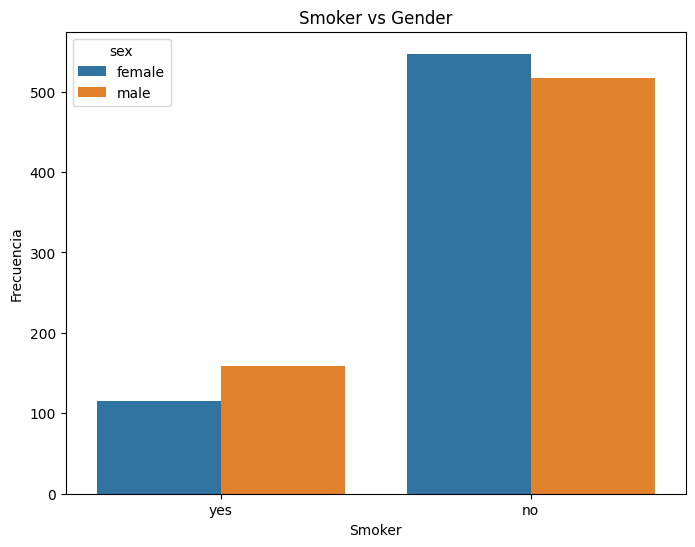

In [24]:
#Grafico apilado de smoker y genero
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoker', hue='sex')
plt.xlabel('Smoker')
plt.ylabel('Frecuencia')
plt.title('Smoker vs Gender')
plt.show()
#Este grafico permite ver que hay mas hombres fumadores que mujeres fumadoras.

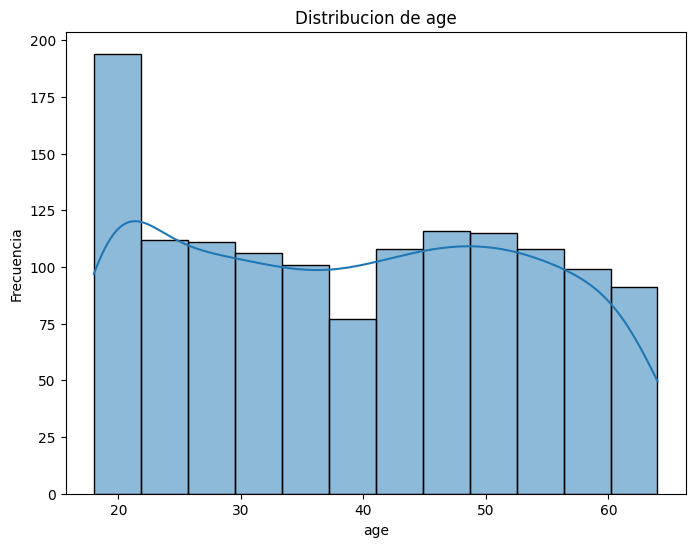

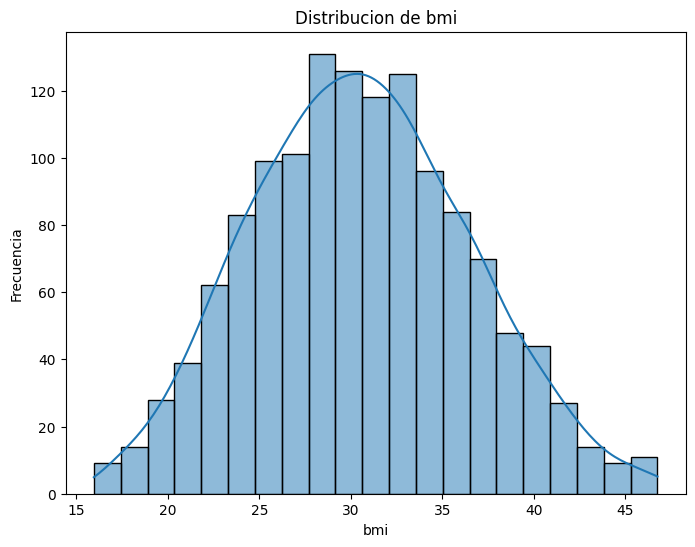

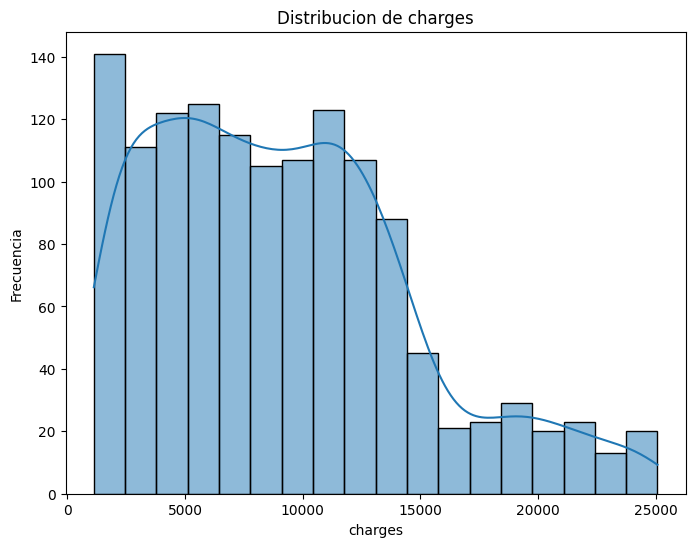

In [26]:
#Distribucion de variables numericas
numeric_columns = df[['age', 'bmi', 'charges']]
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribucion de {col}')
    plt.show()
#El grafico de edad permite ver que hay mayor cantidad de personas jovenes.
#Podemos ver que tenemos una distribucion normal de indice de masa corporal.
#La distribucion de charges muestra que hay pocos valores altos, manteniendose mayoritariamente hacia los precios mas bajos.

Preprocesamiento de datos

In [39]:
import pandas as pd
#La solicitud de la tarea es utilizar modelos de clasificacion, por lo cual transformamos la variable en categorias.
#Definir los rangos para las categorias
bins = [0, 10000, 50000, float('inf')]  #Define los rangos
labels = ['Bajo', 'Medio', 'Alto']  #Etiquetas de las categorias

df['charges_category'] = pd.cut(df['charges'], bins=bins, labels=labels, right=False)

#Mostrar las primeras filas para verificar
print(df[['charges', 'charges_category']].head())


       charges charges_category
0  16884.92400            Medio
1   1725.55230             Bajo
2   4449.46200             Bajo
3  21984.47061            Medio
4   3866.85520             Bajo


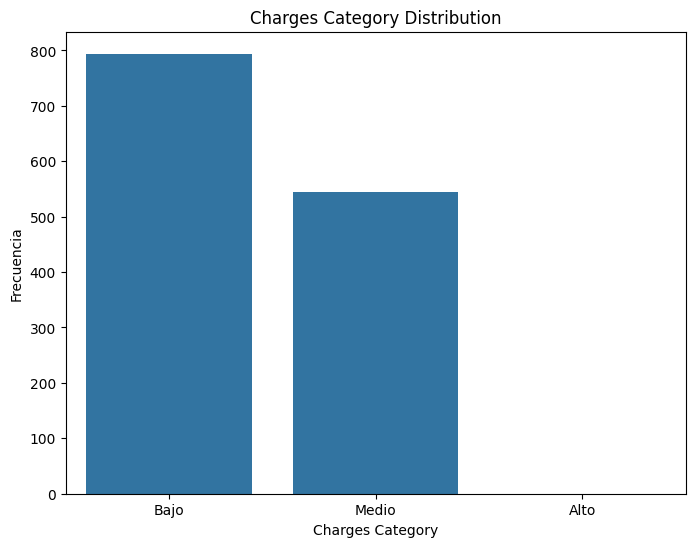

In [58]:
#Grafico de barras de charges category
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='charges_category')
plt.xlabel('Charges Category')
plt.ylabel('Frecuencia')
plt.title('Charges Category Distribution')
plt.show()
#Las clases estan desbalanceadas lo que podria ocasionar problemas a la hora de predecir.

In [40]:
#Codificacion de variables categoricas utilizando One-Hot Encoding
#Escalar caracteristicas numericas utilizando Standard Scaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
#Separamos las variables de entrenamiento y objetivo para evitar data leakege
X = df.drop(['charges_category', 'charges'], axis=1)
y = df['charges_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = ['sex', 'smoker', 'region']
numerical_columns = ['age', 'bmi', 'children']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ])


In [49]:
#Regresion logistica con GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#Definir el espacio de hiperparametros
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300]
}

#Crear el modelo con un pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

#Configurar GridSearchCV
grid_search = GridSearchCV(estimator= pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

#Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

#Mostrar los mejores hiperparametros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

#Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

#Matriz de Confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Mejores hiperparámetros encontrados:
{'classifier__C': 10, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Exactitud del mejor modelo: 0.8582089552238806
Informe de Clasificación:
              precision    recall  f1-score   support

        Bajo       0.91      0.86      0.88       170
       Medio       0.78      0.86      0.82        98

    accuracy                           0.86       268
   macro avg       0.85      0.86      0.85       268
weighted avg       0.86      0.86      0.86       268

Matriz de Confusión:
[[146  24]
 [ 14  84]]


In [50]:
#Regresion logistica con RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir el espacio de hiperparámetros
param_dist = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(-3, 3, 7),  # Genera valores entre 0.001 y 1000 en una escala logarítmica
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300]
}

#Crear el modelo con un pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator= pipeline, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Ejecutar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparametros
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

# Evaluar el modelo
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Exactitud del mejor modelo (Random Search): {accuracy_random}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_random))

# Matriz de Confusion
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
print('Matriz de Confusión:')
print(conf_matrix_random)


Mejores hiperparámetros encontrados:
{'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__max_iter': 100, 'classifier__C': 1000.0}
Exactitud del mejor modelo (Random Search): 0.8582089552238806
Informe de Clasificación:
              precision    recall  f1-score   support

        Bajo       0.91      0.86      0.88       170
       Medio       0.78      0.86      0.82        98

    accuracy                           0.86       268
   macro avg       0.85      0.86      0.85       268
weighted avg       0.86      0.86      0.86       268

Matriz de Confusión:
[[146  24]
 [ 14  84]]


In [52]:
#KNN de clasificacion con Grid Search
#Regresion logistica con GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN

# Definir el espacio de hiperparámetros para KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

#Crear el modelo con un pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNN())
])

#Configurar GridSearchCV
grid_search = GridSearchCV(estimator= pipeline, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)

#Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

#Mostrar los mejores hiperparametros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

#Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

#Matriz de Confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Mejores hiperparámetros encontrados:
{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}
Exactitud del mejor modelo: 0.8768656716417911
Informe de Clasificación:
              precision    recall  f1-score   support

        Bajo       0.91      0.89      0.90       170
       Medio       0.82      0.85      0.83        98

    accuracy                           0.88       268
   macro avg       0.87      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268

Matriz de Confusión:
[[152  18]
 [ 15  83]]


In [53]:
#KNN con Randomized search
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir el espacio de hiperparametros
param_dist_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

#Crear el modelo con un pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNN())
])

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator= pipeline, param_distributions=param_dist_knn, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Ejecutar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparametros
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

# Evaluar el modelo
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Exactitud del mejor modelo (Random Search): {accuracy_random}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_random))

# Matriz de Confusión
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
print('Matriz de Confusión:')
print(conf_matrix_random)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'classifier__weights': 'distance', 'classifier__n_neighbors': 11, 'classifier__metric': 'euclidean'}
Exactitud del mejor modelo (Random Search): 0.8768656716417911
Informe de Clasificación:
              precision    recall  f1-score   support

        Bajo       0.91      0.89      0.90       170
       Medio       0.82      0.85      0.83        98

    accuracy                           0.88       268
   macro avg       0.87      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268

Matriz de Confusión:
[[152  18]
 [ 15  83]]


In [56]:
#Arbol de decision con Grid Search
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Definir el espacio de hiperparametros
param_tree = {
  "classifier__max_depth" : [3, 5],
  "classifier__min_samples_split" : [32, 64, 128],
  "classifier__min_samples_leaf" : [32, 64, 128],
  "classifier__criterion" : ["gini", "entropy"]
}

#Crear modelo con pipeline
#Crear el modelo con un pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

#Configurar GridSearchCV
grid_search = GridSearchCV(estimator= pipeline, param_grid=param_tree, scoring='accuracy', cv=5, n_jobs=-1)

#Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

#Mostrar los mejores hiperparametros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

#Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

#Matriz de Confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Mejores hiperparámetros encontrados:
{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 32, 'classifier__min_samples_split': 32}
Exactitud del mejor modelo: 0.9402985074626866
Informe de Clasificación:
              precision    recall  f1-score   support

        Bajo       0.93      0.98      0.95       170
       Medio       0.97      0.87      0.91        98

    accuracy                           0.94       268
   macro avg       0.95      0.92      0.93       268
weighted avg       0.94      0.94      0.94       268

Matriz de Confusión:
[[167   3]
 [ 13  85]]


In [57]:
#Arbol de decision con RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier as tree
import numpy as np

# Definir el espacio de hiperparametros
param_dist_tree = {
  "classifier__max_depth" : [3, 5],
  "classifier__min_samples_split" : [32, 64, 128],
  "classifier__min_samples_leaf" : [32, 64, 128],
  "classifier__criterion" : ["gini", "entropy"]
}

#Crear el modelo con un pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', tree())
])

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator= pipeline, param_distributions=param_dist_tree, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Ejecutar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

# Evaluar el modelo
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Exactitud del mejor modelo (Random Search): {accuracy_random}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_random))

# Matriz de Confusión
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
print('Matriz de Confusión:')
print(conf_matrix_random)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'classifier__min_samples_split': 32, 'classifier__min_samples_leaf': 32, 'classifier__max_depth': 5, 'classifier__criterion': 'gini'}
Exactitud del mejor modelo (Random Search): 0.9402985074626866
Informe de Clasificación:
              precision    recall  f1-score   support

        Bajo       0.93      0.98      0.95       170
       Medio       0.97      0.87      0.91        98

    accuracy                           0.94       268
   macro avg       0.95      0.92      0.93       268
weighted avg       0.94      0.94      0.94       268

Matriz de Confusión:
[[167   3]
 [ 13  85]]
